# Antal rum

In [1]:
import os
import glob

import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
from helpers import *

# Data prep

In [30]:
df = df = pd.read_csv('../indata/supermappen/Tabell4B_Ekbistkonbas17Ny.csv', encoding='latin1' , sep=';', decimal=',')

In [31]:
df = df.rename(columns={
    'basomrade': 'BASKOD2010',
    'man': 'male',
    'kvinna': 'female',
    'tot': 'total'
})

In [32]:
df = baskod2010tobasomrade(df).drop(columns=['BASKOD2010', 'BASKOD2000'])

In [33]:
male = df[['basomrade', 'male']].rename(columns={'male':'value'})
male['Kön'] = 'male'
female = df[['basomrade', 'female']].rename(columns={'female':'value'})
female['Kön'] = 'female'

df = pd.concat([male, female], sort=False)
df['year'] = '2017'

df['Kön'] = df['Kön'].astype('category')

In [34]:
df.head()

,basomrade,value,Kön,year
1,1010120_skeppsbron,0,male,2017
2,1010130_munkbron,0,male,2017
3,1010140_stortorget,0,male,2017
5,1010220_klara_kyrka,0,male,2017
6,1010230_centralposten,0,male,2017


# Antal med ekonomiskt bistånd

In [42]:
concept = 'ekbist_18_64_tot'

In [44]:
total = df.groupby(['basomrade', 'year']).sum().reset_index()

In [45]:
output = appendNewDatapoints(concept, total, new=True)

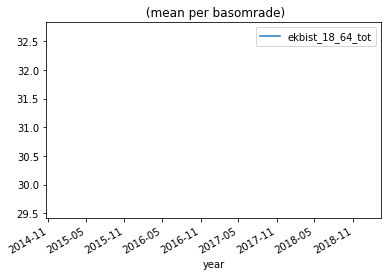

In [46]:
plotcombined(output, concept)

In [47]:
male, female = byGender(concept, df, new=True)

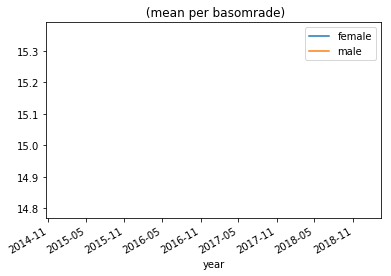

In [48]:
plotcombined(female, 'female')
plotcombined(male, 'male')